In [1]:
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def get_meal_code(meal):    
    code = 0
    if meal == "meal":
        code = 1
    elif meal=="lunch":
        code = 2
    elif meal=="dinner":
        code = 3
    elif meal=="snack":
        code = 4    
    elif meal=="drink":
        code = 5
    elif meal=="eat":
        code = 6
    return code;

def process_meal_annots_steven(annots, accel, subject_code, session):
    meal_count = len(annots)
    accel_count = len(accel)
    #if subject_code == 5 and session == 0:
    #    meal_count = 9
    #elif subject_code == 6 and session == 0:
    #    meal_count = 2
    #elif subject_code == 102 and session == 1:
    #    meal_count = 1
    #elif subject_code == 104 and session == 0:
    #    meal_count = 7
    
    j = 0
    a = np.zeros((meal_count, 3))
    for i in range(meal_count):        
        s = annots[i].split(",")
        a[i, 0] = float(s[1].rstrip())
        a[i, 1] = float(s[2].rstrip())
        a[i, 2] = get_meal_code(s[3].rstrip().strip())
        
        if a[i, 2]==0:
            print(" \n\n******************* Meal code problem *************** code is -1\n\n")
            
    return a

In [36]:
def read_data_steven_free():
    path = 'C:\\ASM\\PublicData\\eating_steventech\\free'
    subject_codes = [2, 3, 4, 5, 6, 101, 102, 103, 104, 107, 109]
    
    data = [];
    for subject in range(len(subject_codes)):
        dsubject = [];
        sess_count = 2
        if subject_codes[subject] == 107:
            sess_count = 5
        
        for sess in range(sess_count):
            print(subject, sess)
            if subject_codes[subject] < 10:
                filePathAccel = path + "\\0" + str(subject_codes[subject]) + "\\000" + str(sess) + "\\watch_right_000" + str(sess) + ".csv";
                filePathAnnots = path + "\\0" + str(subject_codes[subject]) + "\\000" + str(sess) + "\\meal_events.csv";
            elif subject_codes[subject] == 109:
                filePathAccel = path + "\\" + str(subject_codes[subject]) + "\\000" + str(sess+3) + "\\watch_right_000" + str(sess+3) + ".csv";
                filePathAnnots = path + "\\" + str(subject_codes[subject]) + "\\000" + str(sess+3) + "\\meal_events.csv";
            else:
                filePathAccel = path + "\\" + str(subject_codes[subject]) + "\\000" + str(sess) + "\\watch_right_000" + str(sess) + ".csv";
                filePathAnnots = path + "\\" + str(subject_codes[subject]) + "\\000" + str(sess) + "\\meal_events.csv";
          
            accel = np.genfromtxt(filePathAccel, delimiter=',')
            t = accel[:, 0]/1e9
          
            file = open(filePathAnnots)
            annots = file.readlines()
            annots = process_meal_annots_steven(annots, accel, subject_codes[subject], sess)                                
            
            dsess = [accel, annots]        
            dsubject.append(dsess)        
            
        data.append(dsubject)
    return data
    

In [37]:
d = read_data_steven_free()

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
6 0
6 1
7 0
7 1
8 0
8 1
9 0
9 1
9 2
9 3
9 4
10 0
10 1


In [52]:
durations = []
for subject in range(len(d)):    
    subject_data = d[subject]
    for sess in range(len(subject_data)):        
        t = d[subject][sess][0][-1, 0]/1e9
        #print('{}, {} :: {}'.format(subject, sess, t/3600))
        #durations.append(t/3600)
        
        a = d[subject][sess][1]
        for i in range(len(a)):
            if a[i, 0] > t:
                print('{}, {}, {}:: excluded completely:: {}'.format(subject, sess, a[i, 2], (a[i,1]-a[i,0])/60))
                
            if a[i, 0] < t and a[i, 1]>t:
                print('{}, {}, {}:: excluded partially:: {}, {}'.format(subject, sess, a[i, 2], (a[i,1]-a[i,0])/60, (t-a[i,0])/60) )

#durations  = np.array(durations)
#print(np.mean(durations))


        
        
#duratio

3, 0, 5.0:: excluded completely:: 0.2509666666666211
3, 0, 6.0:: excluded completely:: 8.308950000000005
4, 0, 1.0:: excluded completely:: 19.73695000000001
6, 1, 1.0:: excluded completely:: 10.783966666666675
8, 0, 1.0:: excluded completely:: 44.71880000000007
9, 0, 1.0:: excluded partially:: 28.87410000000006, 3.3515051411333845
9, 2, 1.0:: excluded partially:: 9.347466666666636, 8.128865528833314



0, 0 >> 4826.95, 4885.95, 5.0 :: 0.9833333333333333 :: 60.833333333333336
0, 1 >> 8287.308, 8332.338, 5.0 :: 0.7504999999999806 :: 91.89383333333335
0, 1 >> 24973.1849592, 25037.5599592, 5.0 :: 1.0729166666666667 :: 80.84273299333333
0, 1 >> 29940.7629592, 29993.6359592, 5.0 :: 0.8812166666666599 :: 81.72005000000003

1, 1 >> 6558.788, 10127.369, 5.0 :: 59.47635000000002 :: 95.67031666666665

2, 0 >> 6084.662, 6121.057, 5.0 :: 0.6065833333333255 :: 0.0
2, 0 >> 26704.4279592, 26740.5009592, 5.0 :: 0.601216666666672 :: 216.51383299333332
2, 1 >> 5275.883, 5449.793, 5.0 :: 2.8984999999999976 :: 53.83636666666666
2, 1 >> 14184.9499796, 14225.1949796, 5.0 :: 0.6707500000000134 :: 145.58594966
2, 1 >> 22377.1439796, 22638.7449796, 5.0 :: 4.360016666666646 :: 17.458200000000033
2, 1 >> 26002.1499592, 26012.7649592, 5.0 :: 0.17691666666669334 :: 56.05674966
2, 1 >> 29116.7869592, 29127.6659592, 5.0 :: 0.18131666666668025 :: 51.733699999999956

3, 0 >> 4864.679, 5288.583, 5.0 :: 7.065066666666

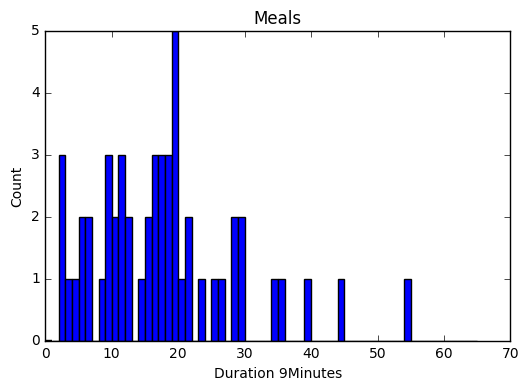

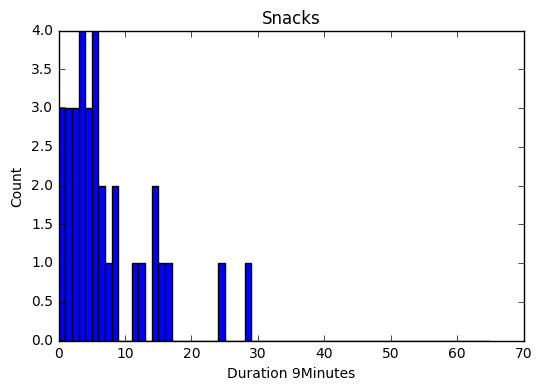

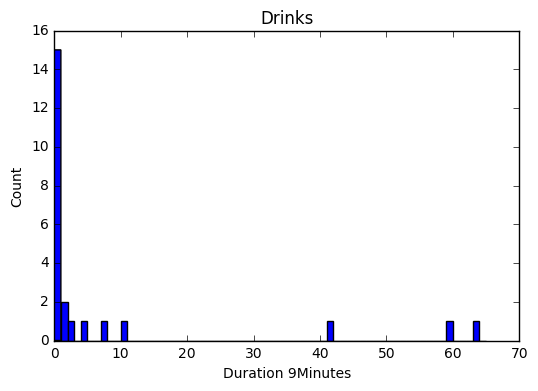

In [49]:
total_sess = 0
annots_all = np.empty((0, 3))
for subject in range(len(d)):
    print()
    subject_data = d[subject]
    for sess in range(len(subject_data)):
        total_sess+=1
        t = d[subject][sess][0][-1, 0]/1e9       
        
        a = d[subject][sess][1]
        for i in range(len(a)):
            diff=0
            if i>0:
                diff = a[i, 0] - a[i-1, 1]
            if a[i,2]==5:
                print('{}, {} >> {}, {}, {} :: {} :: {}'.format(subject, sess, a[i,0], a[i,1], a[i, 2], (a[i, 1]-a[i, 0])/60, diff/60))
                if 0<diff<10*60:
                    print("======== diff is small =================")
        
        annots_all = np.concatenate((annots_all, a))        
        #print("\nSubject {}, Sess{}>>".format(subject, sess))        
        
print("total sess: ", total_sess)
print("total annots: ", len(annots_all))

for i in range(7):
    a = annots_all
    a = a[a[:, 2]==i, :]
    print("Type {} : {}".format(i, len(a)))
        
a = annots_all
m = a[a[:, 2]<=3, :]
m = (m[:,1] - m[:, 0])/60

s = a[a[:, 2]==4, :]
s = (s[:,1] - s[:, 0])/60

dr = a[a[:, 2]==5, :]
dr = (dr[:,1] - dr[:, 0])/60

print(np.amin(m), np.amax(m), np.mean(m), np.median(m))
print(np.amin(s), np.amax(s), np.mean(s), np.median(s))
print(np.amin(dr), np.amax(dr), np.mean(dr), np.median(dr))
e = a[a[:, 2]==6, :]
e = (e[:,1] - e[:, 0])/60
print("Eat: ", e)

a = (a[:,1] - a[:, 0])/60
print(np.amin(a), np.amax(a), np.mean(a), np.median(a))

#print(dr)

mx = np.amax([np.amax(m), np.amax(s), np.amax(dr)])
edges = np.arange(0, mx+2)


fig, ax = plt.subplots()
plt.hist(m, bins=edges)
#plt.ylim([0, 6])
plt.xlabel('Duration 9Minutes')
plt.ylabel('Count')
plt.title('Meals')

fig, ax = plt.subplots()
plt.hist(s, bins=edges)
#plt.ylim([0, 6])
plt.xlabel('Duration 9Minutes')
plt.ylabel('Count')
plt.title('Snacks')

fig, ax = plt.subplots()
plt.hist(dr, bins=edges)
#plt.ylim([0, 6])
plt.xlabel('Duration 9Minutes')
plt.ylabel('Count')
plt.title('Drinks')

        